In [1]:
import kaolin as kal
import plyfile
import numpy as np
import torch
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

ModuleNotFoundError: No module named 'kaolin'

In [4]:
plyelem = plyfile.PlyData.read("data/mvs_dataset/point_clouds/stl/stl001_total.ply")



In [43]:
l = plyelem.elements[0].data.tolist()

In [44]:
triangles = np.vstack(l)

In [49]:
ply = kal.rep.PointCloud(points=torch.tensor(triangles))


In [1]:
import numpy as np
import pandas as pd

import binvox_rw

from pyntcloud import PyntCloud


cloud = PyntCloud.from_file("data/mvs_dataset/point_clouds/stl/stl021_total.ply")

# cloud.plot(mesh=True, backend="threejs")

voxelgrid_id = cloud.add_structure("voxelgrid", n_x=32, n_y=32, n_z=32)
voxelgrid = cloud.structures[voxelgrid_id]
# voxelgrid.plot(d=3, mode="density", cmap="hsv")

x_cords = voxelgrid.voxel_x
y_cords = voxelgrid.voxel_y
z_cords = voxelgrid.voxel_z

voxel = np.zeros((32, 32, 32)).astype(np.bool)

for x, y, z in zip(x_cords, y_cords, z_cords):
    voxel[x][y][z] = True

with open("00000.binvox", 'wb') as f:
    v = binvox_rw.Voxels(voxel, (32, 32, 32), (0, 0, 0), 1, 'xyz')
    v.write(f)

c:\users\filip\anaconda3\envs\kaolin\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


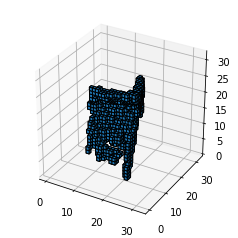

In [5]:
with open("00000.binvox", 'rb') as f:
    volume = binvox_rw.read_as_3d_array(f)
    volume = volume.data.astype(np.float32)

volume = volume.squeeze().__ge__(0.3)
volume = np.swapaxes(volume, 0,2)

fig = plt.figure()
ax = fig.gca(projection=Axes3D.name)
# ax.invert_yaxis()
ax.set_aspect('equal')
ax.voxels(volume, edgecolor="k")

fig.canvas.draw()
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
img = img.reshape(fig.canvas.get_width_height()[::-1] + (3, ))

In [4]:
kal.conversions.pointcloud_to_voxelgrid(ply,128,0.23)

NameError: name 'ply' is not defined